# Generating Caption For a Random Image

## Initializing the VGG Model with Pre-trained Weights

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

## Getting the Image Features

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def get_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    features = model.predict(img, verbose=0)
    return features

## Getting the Tokenizer

In [4]:
import pickle
# Loading the tokenizer
with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

In [5]:
len(tokenizer.word_index) + 1

8485

## Loading and Making Prediction with Saved Model

In [6]:
import tensorflow as tf
model_2 = tf.keras.models.load_model('CNN_LSTM_2.h5')

In [7]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    # Iterate over max_length of sequences
    for i in range(max_length):
        # Encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model_2.predict([image, sequence], verbose = 0)
        # Get index with highest prob
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

def generate_caption(img_name):
    # Load the image
        #img_name = "410413536_11f1127c46.jpg"
    img_id, _ = img_name.split(".")
    img_path = os.path.join(BASE_DIR, "Images", img_name)
    img = Image.open(img_path)

    captions = description[img_id]
    print('-----------------ACTUAL------------------')
    for caption in captions:
        print(caption)
    # Predict the caption
    y_pred = predict_caption(model, features[img_id], tokenizer, max_length)
    print('---------------PREDICTED-----------------')
    print(y_pred)
    plt.imshow(img)

In [10]:
def generate_caption_new(img_path, img_features):
    # Load the image
        #img_name = "410413536_11f1127c46.jpg"
#     img_id, _ = img_name.split(".")
#     img_path = os.path.join(BASE_DIR, "Images", img_name)
    img = Image.open(img_path)

#     captions = description[img_id]
#     print('-----------------ACTUAL------------------')
#     for caption in captions:
#         print(caption)
    # Predict the caption
    max_length=35
    y_pred = predict_caption(model, img_features, tokenizer, max_length)
    print('---------------PREDICTED-----------------')
    print(y_pred)
    plt.imshow(img)

## Creating the Function To Generate the Final Caption

In [11]:
#img = "3650986674_3e101c606b.jpg"
img = "3721082512_8277087f3f.jpg"

In [30]:
WORKING_DIR = r'C:\Users\rajat\OneDrive\Desktop\Tensorflow\ImageCaptioning'
# Load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [32]:
img_id = img.split('.')[0]
features[img_id]

array([[0.535884 , 0.       , 0.       , ..., 0.       , 2.2089512,
        8.387295 ]], dtype=float32)

In [46]:
fe = get_features(img)

In [47]:
fe

array([[0.       , 1.5673441, 1.5306848, ..., 0.       , 4.4828553,
        0.8976505]], dtype=float32)

In [48]:
max_length = 37

---------------PREDICTED-----------------
startseq and are are are man dog three beach is young startseq the and is mouth startseq the startseq the startseq the startseq the startseq the startseq the startseq the startseq the startseq the startseq the startseq the


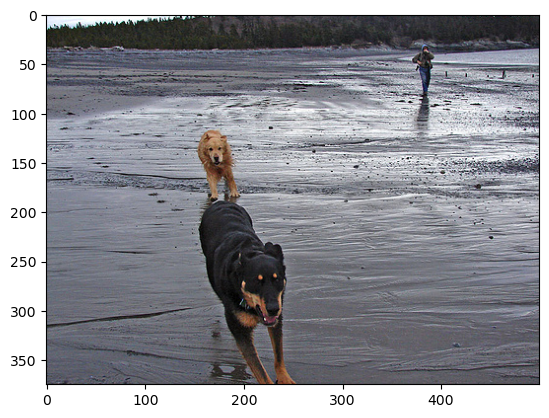

In [49]:
generate_caption_new(img, fe)

In [13]:
import numpy as np

In [16]:
def caption(img_path):
    features = get_features(img_path)
    generate_caption_new(img_path, features)

---------------PREDICTED-----------------
startseq bicyclist rides through the woods endseq


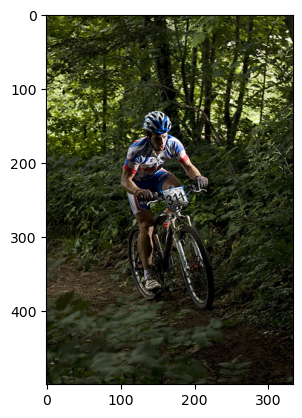

In [17]:
caption(img)

---------------PREDICTED-----------------
startseq the dog is pulling neck ball in the grass endseq


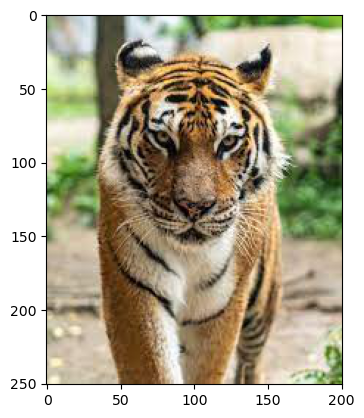

In [18]:
caption("test.jpeg")

In [30]:
img = Image.open("test.jpeg")
Image.cl

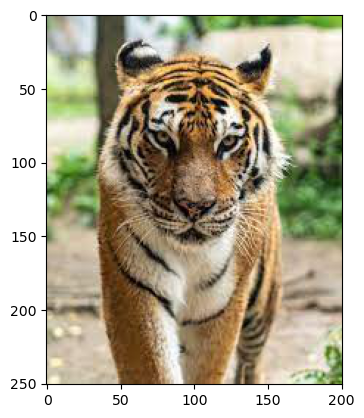

In [31]:
plt.imshow(img)